# Time-Series Influenza forecasting using ARIMA model 

#### [Seasonal] AutoRegressive Integreated Moving Average 

In [103]:
'''By Sans Basnet at ImageTrend.'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [104]:
df = pd.read_csv('ILICDC.csv') #Open-sourced CDC dataset for Influenza cases in the United States
df

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,Alabama,2010,40,X,2.13477,X,X,X,X,X,X,249,35,11664
1,States,Alaska,2010,40,X,0.875146,X,X,X,X,X,X,15,7,1714
2,States,Arizona,2010,40,X,0.674721,X,X,X,X,X,X,172,49,25492
3,States,Arkansas,2010,40,X,0.696056,X,X,X,X,X,X,18,15,2586
4,States,California,2010,40,X,1.95412,X,X,X,X,X,X,632,112,32342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30558,States,Wyoming,2021,33,X,0.0766284,X,X,X,X,X,X,1,3,1305
30559,States,Commonwealth of the Northern Mariana Islands,2021,33,X,X,X,X,X,X,X,X,X,X,X
30560,States,Puerto Rico,2021,33,X,8.42572,X,X,X,X,X,X,152,5,1804
30561,States,Virgin Islands,2021,33,X,0,X,X,X,X,X,X,0,2,975


In [105]:
df = df.drop(['REGION TYPE','% WEIGHTED ILI','AGE 0-4','AGE 25-49', 'AGE 25-64','AGE 5-24','AGE 50-64','AGE 65'], axis=1)

In [106]:
df['providers'] = df['NUM. OF PROVIDERS'].astype(str).apply(lambda x: x.replace('X', '0')).astype(int)
df['tot_patients'] = df['TOTAL PATIENTS'].astype(str).apply(lambda x: x.replace('X', '0')).astype(int)
df['ILI_tot'] = df['ILITOTAL'].astype(str).apply(lambda x: x.replace('X', '0')).astype(int)

In [107]:
df['%unweighILI'] = df['%UNWEIGHTED ILI'].astype(str).apply(lambda x: x.replace('X', '0')).astype(float)

In [108]:
df = df.drop(['%UNWEIGHTED ILI','ILITOTAL','NUM. OF PROVIDERS','TOTAL PATIENTS'], axis=1)
df

,REGION,YEAR,WEEK,providers,tot_patients,ILI_tot,%unweighILI
0,Alabama,2010,40,35,11664,249,2.134770
1,Alaska,2010,40,7,1714,15,0.875146
2,Arizona,2010,40,49,25492,172,0.674721
3,Arkansas,2010,40,15,2586,18,0.696056
4,California,2010,40,112,32342,632,1.954120
...,...,...,...,...,...,...,...
30558,Wyoming,2021,33,3,1305,1,0.076628
30559,Commonwealth of the Northern Mariana Islands,2021,33,0,0,0,0.000000
30560,Puerto Rico,2021,33,5,1804,152,8.425720
30561,Virgin Islands,2021,33,2,975,0,0.000000


In [109]:
timeseries_df = df.drop(['REGION','providers','tot_patients','%unweighILI'], axis=1)
timeseries_df

,YEAR,WEEK,ILI_tot
0,2010,40,249
1,2010,40,15
2,2010,40,172
3,2010,40,18
4,2010,40,632
...,...,...,...
30558,2021,33,1
30559,2021,33,0
30560,2021,33,152
30561,2021,33,0


In [110]:
final_df = pd.to_datetime(df.YEAR.astype(str), format='%Y') + \
             pd.to_timedelta(df.WEEK.mul(7).astype(str) + ' days')

In [111]:
cdc_df = pd.concat([final_df, timeseries_df], axis=1)

In [113]:
new_df = cdc_df.drop(['YEAR','WEEK'], axis=1)
new_df

,0,ILI_tot
0,2010-10-08,249
1,2010-10-08,15
2,2010-10-08,172
3,2010-10-08,18
4,2010-10-08,632
...,...,...
30558,2021-08-20,1
30559,2021-08-20,0
30560,2021-08-20,152
30561,2021-08-20,0


In [115]:
new_df.to_csv("ili_deploy.csv", index=False)

In [11]:
new_df.dtypes

0          datetime64[ns]
ILI_tot             int32
dtype: object

In [12]:
new_df.isnull().sum()

0          0
ILI_tot    0
dtype: int64

In [13]:
new_df = new_df.set_index([0])
new_df.index

DatetimeIndex(['2010-10-08', '2010-10-08', '2010-10-08', '2010-10-08',
               '2010-10-08', '2010-10-08', '2010-10-08', '2010-10-08',
               '2010-10-08', '2010-10-08',
               ...
               '2021-08-20', '2021-08-20', '2021-08-20', '2021-08-20',
               '2021-08-20', '2021-08-20', '2021-08-20', '2021-08-20',
               '2021-08-20', '2021-08-20'],
              dtype='datetime64[ns]', name=0, length=30563, freq=None)

In [14]:
y = new_df['ILI_tot'].resample('MS').mean()

In [15]:
y['2010':].head

<bound method NDFrame.head of 0
2010-10-01    174.884615
2010-11-01    225.355769
2010-12-01    324.442308
2011-01-01    458.519231
2011-02-01    637.860577
                 ...    
2021-04-01    238.134545
2021-05-01    267.350000
2021-06-01    271.168182
2021-07-01    348.876364
2021-08-01    505.733333
Freq: MS, Name: ILI_tot, Length: 131, dtype: float64>

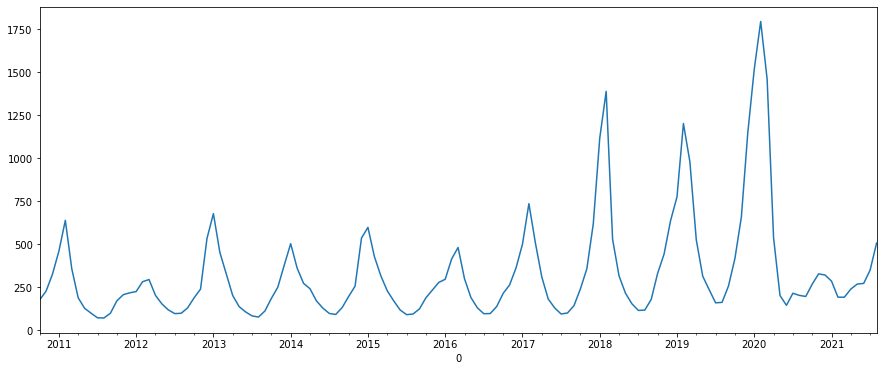

In [16]:
y.plot(figsize=(15, 6))
plt.show()

In [17]:
! pip install --upgrade --no-deps statsmodels

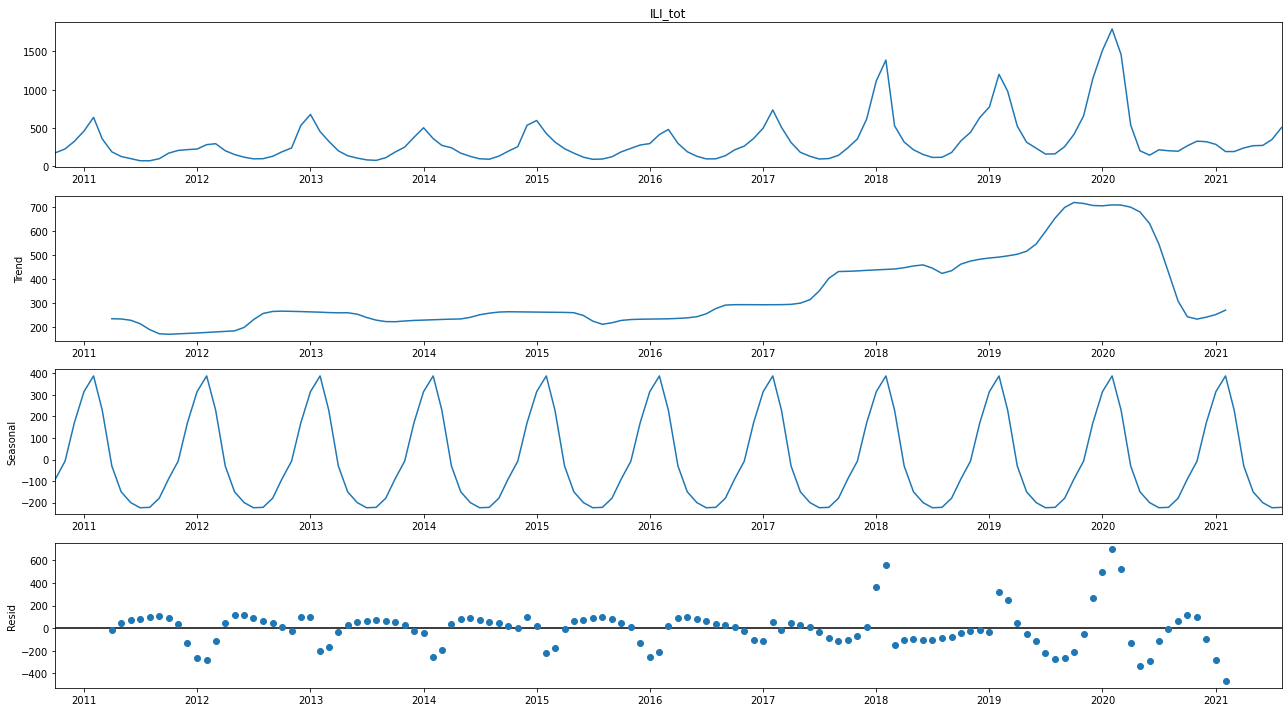

In [18]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [176]:
import warnings
import itertools
warnings.filterwarnings("ignore")

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Parameter combinations for Seasonal-ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Parameter combinations for Seasonal-ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is a parameter Selection. Using “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [177]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{} x {}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0) x (0, 0, 0, 12)12 - AIC:1960.2283525023295
ARIMA(0, 0, 0) x (0, 0, 1, 12)12 - AIC:1724.244119202467
ARIMA(0, 0, 0) x (0, 1, 0, 12)12 - AIC:1682.0318405095907
ARIMA(0, 0, 0) x (0, 1, 1, 12)12 - AIC:1490.3587566048282
ARIMA(0, 0, 0) x (1, 0, 0, 12)12 - AIC:1684.3886988630695
ARIMA(0, 0, 0) x (1, 0, 1, 12)12 - AIC:1642.5180045201353
ARIMA(0, 0, 0) x (1, 1, 0, 12)12 - AIC:1492.9577553014276
ARIMA(0, 0, 0) x (1, 1, 1, 12)12 - AIC:1480.5250089744925
ARIMA(0, 0, 1) x (0, 0, 0, 12)12 - AIC:1811.9283172644018
ARIMA(0, 0, 1) x (0, 0, 1, 12)12 - AIC:1592.5210160650724
ARIMA(0, 0, 1) x (0, 1, 0, 12)12 - AIC:1567.4880167235638
ARIMA(0, 0, 1) x (0, 1, 1, 12)12 - AIC:1392.0515718380843
ARIMA(0, 0, 1) x (1, 0, 0, 12)12 - AIC:1579.3692618311165
ARIMA(0, 0, 1) x (1, 0, 1, 12)12 - AIC:1540.1750927692929
ARIMA(0, 0, 1) x (1, 1, 0, 12)12 - AIC:1421.5750579221306
ARIMA(0, 0, 1) x (1, 1, 1, 12)12 - AIC:1393.8954091851788
ARIMA(0, 1, 0) x (0, 0, 0, 12)12 - AIC:1714.4955997855752
ARIMA(0, 1, 0) 

The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. AIC offers a means for model selection.The above output suggests that SARIMAX(1, 1, 1) x (1, 1, 0, 12) yields the lowest AIC value of 1352.376305105772. Therefore we should consider this to be optimal option.

In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2432      0.265     -0.918      0.359      -0.763       0.276
ma.L1          0.5778      0.245      2.362      0.018       0.098       1.057
ar.S.L12      -0.4204      0.073     -5.739      0.000      -0.564      -0.277
sigma2      2.833e+04   2686.181     10.547      0.000    2.31e+04    3.36e+04


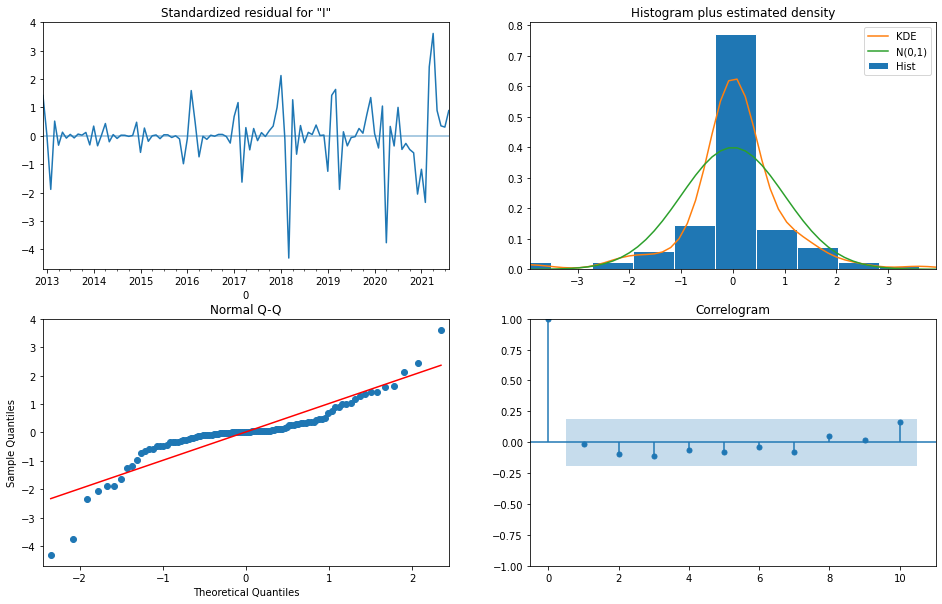

In [22]:
results.plot_diagnostics(figsize=(16, 10))
plt.show()

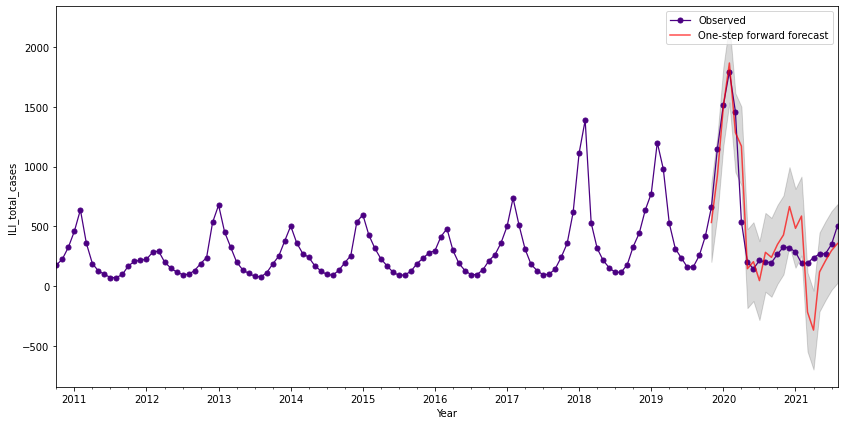

In [23]:
import plotly.express as px
pred = results.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='Observed',color='#4b0082', linewidth=1.25, marker='o', markersize=5, linestyle='-')
pred.predicted_mean.plot(ax=ax, label='One-step forward forecast', alpha=.7, figsize=(14, 7), color='red', linewidth=1.5)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.15)
ax.set_xlabel('Year')
ax.set_ylabel('ILI_total_cases')
plt.legend()

In [24]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 66642.13


In [25]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 258.15


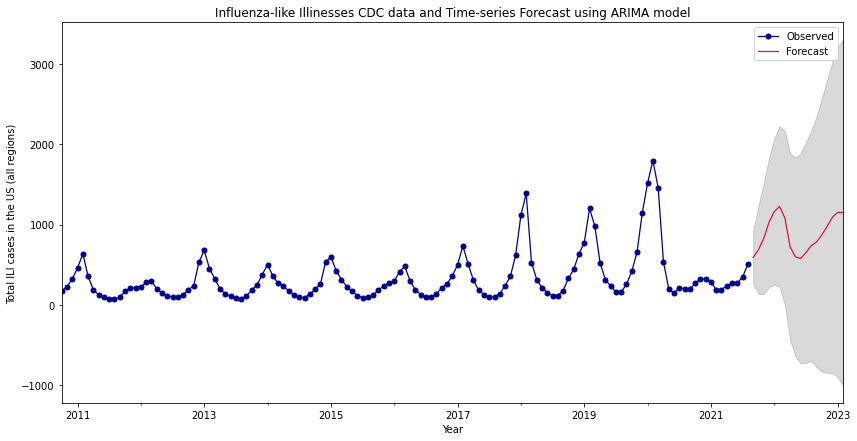

In [26]:
pred_uc = results.get_forecast(steps=18)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=(14, 7), color='darkblue', linewidth=1.25, marker='o', markersize=5, linestyle='-')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='crimson', linewidth=1.25)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.15)
ax.set_xlabel('Year')
ax.set_ylabel('Total ILI cases in the US (all regions)')
ax.set_title('Influenza-like Illinesses CDC data and Time-series Forecast using ARIMA model')
plt.legend()
plt.show()

#### The model's forecast's MSE is 66642.13 and RMSE is 258.15

# Retrievel-based Chatbot using data from IBM Watson Natural Language Understading catalog

In [27]:
import json 
import numpy as np 
import pandas as pd
import re
import os
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

from ibm_watson import NaturalLanguageUnderstandingV1

In [28]:
!pip install ibm_watson

In [29]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions

authenticator = IAMAuthenticator('Ap9D81CdfMiJqjEbs-anU4aH18oRVpvprvCcszQ953aV')
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2021-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url('https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/a40f4354-dcfb-4bad-810f-3a97e3c5075e')

response = natural_language_understanding.analyze(
    url='www.cnn.com',
    features=Features(entities=EntitiesOptions(sentiment=True,limit=1))).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 3238,
    "features": 1
  },
  "retrieved_url": "https://www.cnn.com/",
  "language": "en",
  "entities": [
    {
      "type": "Organization",
      "text": "Espa\u00f1ol",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.949526,
      "disambiguation": {
        "name": "Deportivo_Espa%C3%B1ol_%28Guayaquil%29",
        "dbpedia_resource": "http://dbpedia.org/resource/Deportivo_Espa%C3%B1ol_%28Guayaquil%29"
      },
      "count": 2,
      "confidence": 0.719523
    }
  ]
}


In [30]:
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions

authenticator = IAMAuthenticator('_REDUX4ZTcNjQD8UC7KOZ-BHJIsbA9lsB5W-IBZ78Pj_')
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2021-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url('https://api.au-syd.natural-language-understanding.watson.cloud.ibm.com/instances/5e170335-960d-4260-b1ab-65d0124fb620')


In [32]:
import requests
response = requests.get("https://api.au-syd.natural-language-understanding.watson.cloud.ibm.com/instances/5e170335-960d-4260-b1ab-65d0124fb620")
print(response.status_code)

401


In [87]:
!curl -V

curl 7.71.1 (x86_64-pc-win32) libcurl/7.71.1 Schannel zlib/1.2.11 libssh2/1.9.0
Release-Date: 2020-07-01
Protocols: dict file ftp ftps gopher http https imap imaps ldap ldaps pop3 pop3s rtsp scp sftp smb smbs smtp smtps telnet tftp 
Features: AsynchDNS IPv6 Kerberos Largefile NTLM SPNEGO SSL SSPI UnixSockets libz


In [95]:
from ibm_watson import AssistantV1 
from ibm_cloud_sdk_core.authenticators import BasicAuthenticator
 
username = '{Key}'
password = '{Key}}'
 
authenticator = BasicAuthenticator(username, password) 
assistant = AssistantV1( version='2018-08-01', authenticator=authenticator ) 
assistant.set_service_url('https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/a40f4354-dcfb-4bad-810f-3a97e3c5075e')

In [96]:
username = '{Key}'
password = 'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/a40f4354-dcfb-4bad-810f-3a97e3c5075e'
authenticator = BasicAuthenticator(username, password) 
assistant = AssistantV1( version='2018-08-01', authenticator=authenticator ) 

In [97]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions

authenticator = IAMAuthenticator('{Key}')
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2021-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url('https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/a40f4354-dcfb-4bad-810f-3a97e3c5075e')

response = natural_language_understanding.analyze(
    html="<html><head><title>Fruits</title></head><body><h1>Apples and Oranges</h1><p>I love apples! I don't like oranges.</p></body></html>",
    features=Features(emotion=EmotionOptions(targets=['apples','oranges']))).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 37,
    "features": 1
  },
  "language": "en",
  "emotion": {
    "targets": [
      {
        "text": "apples",
        "emotion": {
          "sadness": 0.028574,
          "joy": 0.859042,
          "fear": 0.02752,
          "disgust": 0.017519,
          "anger": 0.012855
        }
      },
      {
        "text": "oranges",
        "emotion": {
          "sadness": 0.514253,
          "joy": 0.078317,
          "fear": 0.074223,
          "disgust": 0.058103,
          "anger": 0.126859
        }
      }
    ],
    "document": {
      "emotion": {
        "sadness": 0.32665,
        "joy": 0.563273,
        "fear": 0.033387,
        "disgust": 0.022637,
        "anger": 0.041796
      }
    }
  }
}


In [180]:
import requests
import json
data = requests.get("https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/a40f4354-dcfb-4bad-810f-3a97e3c5075e").json()

file_name = "intents.json"
with open(file_name, "w") as f:
    json.dump(data, f, indent=4)
    print(file_name, "saved successfully!")

intents.json saved successfully!


In [119]:
with open('intents.json') as file:
    data = json.load(file)

In [120]:
training_sentences = []
training_labels = []
labels = []
responses = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])

In [121]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

num_classes = len(labels)

In [165]:
vocab_size = 1000
embedding_dim = 60
max_len = 10
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token) 
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

truncating=”post” setting this truncating parameter as post means that when a sentence exceeds the number of maximum words drop the last words in the sentence instead of the default setting which drops the words from the beginning of the sentence.

In [171]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

In [172]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 10, 60)            60000     
_________________________________________________________________
global_average_pooling1d_11  (None, 60)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 16)                976       
_________________________________________________________________
dense_51 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_52 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 136       
Total params: 61,656
Trainable params: 61,656
Non-trainable params: 0
_________________________________________________

In [173]:
EPOCHS = 100
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(padded_sequences, np.array(training_labels), epochs=EPOCHS)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 2.0843 - accuracy: 0.0909
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 2.0776 - accuracy: 0.1212
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 2.0727 - accuracy: 0.2424
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 2.0669 - accuracy: 0.2424
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 2.0614 - accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 0s 997us/step - loss: 2.0555 - accuracy: 0.3030
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 2.0499 - accuracy: 0.3030
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 2.0446 - accuracy: 0.2424
Epoch 9/100
2/2 [==============================] - 0s 995us/step - loss: 2.0388 - accuracy: 0.2424
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 2.0334 - accuracy: 0.2424
Epoch 11/100
2/2 [=======

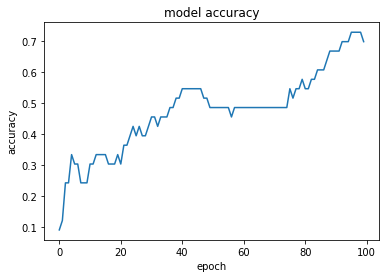

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.show()

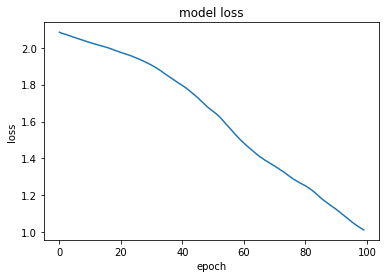

In [175]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('model loss')
plt.show()

In [43]:
model.save("chatbot")

import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chatbot\assets


In [178]:
from termcolor import colored
def Start():
    print('Hi! I\'m a Watson trained bot. \nEnter quit to exit')
    while True:
        string = input('\033[95m' 'You: ')
        if string == 'quit': break
        result = model.predict(pad_sequences(tokenizer.texts_to_sequences([string]),
                                             truncating='post', maxlen=max_len))
        category = lbl_encoder.inverse_transform([np.argmax(result)]) 
        for i in data['intents']:
            if i['tag']==category:
                print(np.random.choice(i['responses']))

In [179]:
Start()

Hi! I'm a Watson trained bot. 
Enter quit to exit
You: Hello
Hello
You: What is your name?
Just call me as Joana
You: Have a good day!
Tell me your problem to assist you
You: No
Hi
You: quit
